In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TODO

* Cambiar os valores de A para que tamen teñas negativos
* Nos quedamos con 2, 8, 16, 32, 256
* Tenemos que hacer lo de los ints
* Y cambiar el acceso a memoria


In [20]:
def leer_csv(filename: str) -> pd.DataFrame:

    pd.set_option('display.max_rows', None)
    df = pd.read_csv(filename, names=["Res", "D", "L", "Ck_per_Access"])
    df = df.drop('Res', axis=1)
    return df

In [27]:

def avg_of_best(df: pd.DataFrame) -> pd.DataFrame:

    data = []
    for d in df['D'].unique():
        for l in df['L'].unique():
            # Media geométrica de los 3 accesos más rapidos 
            ck_avg = df.loc[(df['D'] == d) & (df['L'] == l)] \
            	.nsmallest(3, 'Ck_per_Access')['Ck_per_Access'] \
            	.prod()**(1/3)
            data.append([d, l, ck_avg])
            
    return pd.DataFrame(data, columns=['D', 'L', 'Ck'])

In [24]:
# Saves all graphs
def graph_data(df: pd.DataFrame, type_of_graph: str) -> None:
    
    for d in df['D'].unique():
        fig, ax = plt.subplots()
        
        l_values = [str(i) for i in df.loc[df['D']==d]['L'].values]
        ck_values = list(df.loc[df['D']==d]['Ck'].values)
        
        ax.bar(l_values, ck_values) # Crea la grafica
        ax.set_ylabel('Ciclos de reloj por acceso')
        ax.set_title(f'Valor de D: {d}')
        
        # Guarda las graficas
        plt.savefig(f'data/{type_of_graph}/graphs/graph_{type_of_graph}{d}.png')

# Crear Gráficas Básicas

In [25]:
a = leer_csv('data/double/ck_double.csv')
a = avg_of_best(a)
graph_data(a, 'double')

In [26]:
b = leer_csv('data/int/ck_int.csv')
b = avg_of_best(b)
graph_data(a, 'int')

In [27]:
c = leer_csv('data/no_index/ck_no_index.csv')
c = avg_of_best(c)
graph_data(a, 'no_index')

# Crear Gráficas Agrupadas
* Grupos en función de la L para cada tipo de gráfica
* Gráficas para comparar distintos tipos

## Formato de los datos a darle a las gráficas
{

	"Valor de D": [ck_L1, ck_L2, ck_l3...]
    
}

In [38]:
df = leer_csv('data/double/ck_double.csv')
df = avg_of_best(df)
l_values = tuple(df['L'].unique())
print(l_values)
for d in df['D'].unique():
    c_values = tuple(df.loc[df['D']==d]['Ck'].values)
    print(c_values)
    

(384, 1152, 10240, 15360, 40960, 81920, 163840)
(7.062282869008809, 7.085923030952593, 7.101056236242226, 7.110555490538105, 7.126153157234777, 7.128672347475092, 7.1349083349801345)
(7.037673452640959, 7.130376412273459, 7.138950307790768, 7.157890477837812, 7.187588744745684, 7.1940883149084005, 7.181946973399177)
(7.0729139693710925, 7.123263760527927, 7.200236340361055, 7.388349793455603, 7.290387304396674, 7.305031118349263, 8.69616322242942)
(7.126556319999896, 7.134779212187738, 7.650676779234611, 7.528389494142986, 7.650970070796872, 8.410781868172958, 15.487841847705145)
(7.228713768332372, 7.818241844066022, 9.631727647931251, 13.320728590758495, 15.476941565148335, 16.160466016128368, 16.41789422312537)


In [47]:
# Etiquetas de los Grupos
l_values = tuple(df['L'].unique())
d_values_all = tuple(df['D'].unique())
d_values_small = d_values_all[:3]
d_values_big = d_values_all[3:]

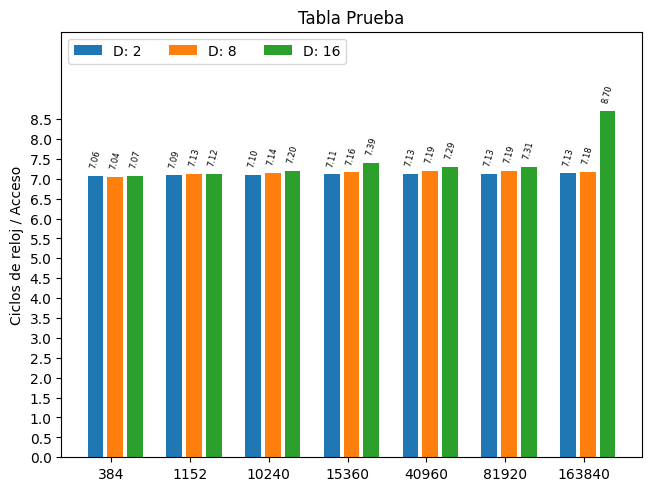

In [243]:
# the label locations
x = np.arange(len(l_values))

# the width of the bars
width = 0.2

# Para la separación entre barras del mismo grupo
multiplier = 0

# Crear las gráficas (ni idea del layout)
fig, ax = plt.subplots(layout='constrained')

ck_max = 0;
for d in d_values_small:
    
    # Tupla de ck
    ck_values = tuple(df.loc[df['D']==d]['Ck'].values)
    
    if max(ck_values) > ck_max:
        ck_max = max(ck_values)
    
    # Separación entre barras del mismo grupo
    offset = width * multiplier
    
    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"D: {d}")
    
    # Etiquetas encima de las barras
    ax.bar_label(rects, padding=5, fmt="%.2f", rotation=75, fontsize=6)
    
    # Offset de cada tupla
    multiplier += 1.25

y_index = np.arange(0.0, ck_max, 0.5)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Tabla Prueba')
ax.set_ylabel('Ciclos de reloj / Acceso')
ax.set_yticks(y_index, )
ax.set_xticks(x + width, l_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ck_max+2)

# plt.show()
# plt.savefig(f'data/{type_of_graph}/graphs/graph_{type_of_graph}_smallD.png')
plt.savefig(f'data/double/graphs/graph_double_smallD.png')

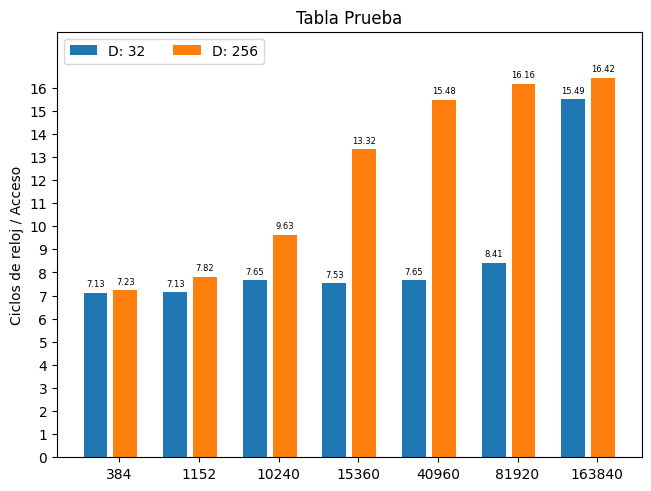

In [242]:
# the label locations
x = np.arange(len(l_values))

# the width of the bars
width = 0.3

# Para la separación entre barras del mismo grupo
multiplier = 0

# Crear las gráficas (ni idea del layout)
fig, ax = plt.subplots(layout='constrained')

ck_max = 0;
for d in d_values_big:
    
    # Tupla de ck
    ck_values = tuple(df.loc[df['D']==d]['Ck'].values)
    
    if max(ck_values) > ck_max:
        ck_max = max(ck_values)
    
    # Separación entre barras del mismo grupo
    offset = width * multiplier
    
    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"D: {d}")
    
    # Etiquetas encima de las barras
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=6)
    
    # Offset de cada tupla
    multiplier += 1.25

y_index = np.arange(0.0, ck_max, 1)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Tabla Prueba')
ax.set_ylabel('Ciclos de reloj / Acceso')
ax.set_yticks(y_index, )
ax.set_xticks(x + width, l_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ck_max+2)

#plt.show()
plt.savefig(f'data/double/graphs/graph_double_bigD.png')

# Crear Gráficas Comparativas

* Cogemos 2 D (8, 16)
* Representar: D1Double, D1Int, D2Double, D2Int para cada L

In [255]:

def graph_comparison(df1: pd.DataFrame, df2: pd.DataFrame, tp1: str, tp2: str) -> None:
    
    l_values = tuple(df1['L'].unique())
    d_values_comp = tuple(df1['D'].unique())[1:3]
    
    # the label locations
    x = np.arange(len(l_values)*2) # porque tenemos dos graficas
    print(x)

    pos_double = np.arange(1.0, len(l_values)*2, 2)
    pos_int = np.arange(0.0, len(l_values)*2, 2)

    # the width of the bars
    width = 0.25

    # Para la separación entre barras del mismo grupo
    multiplier = 0

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;
    for d in d_values_comp:

        # Tupla de ck
        ck1_values = tuple(df1.loc[df['D']==d]['Ck'].values)
        ck2_values = tuple(df2.loc[df['D']==d]['Ck'].values)

        if max(ck1_values) > ck_max:
            ck_max = max(ck1_values)

        if max(ck2_values) > ck_max:
            ck_max = max(ck2_values)

        # Separación entre barras del mismo grupo
        offset = width * multiplier        

        # Barras
        # Esta o importante

        rects_int = ax.bar(pos_int + offset, ck1_values, width, label=f"{tp1} D: {d}")

        rects_double = ax.bar(pos_int + offset + width + 0.09, ck2_values, width, label=f"{tp2} D: {d}")

        # Etiquetas encima de las barras
        ax.bar_label(rects_double, padding=5, fmt="%.2f", fontsize=6, rotation=90)
        ax.bar_label(rects_int, padding=5, fmt="%.2f", fontsize=6, rotation=90)

        # Offset de cada tupla
        multiplier += 2.6

    y_index = np.arange(0.0, ck_max, 1)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Tabla Prueba')
    ax.set_ylabel('Ciclos de reloj / Acceso')
    ax.set_yticks(y_index, )
    ax.set_xticks(pos_int + 0.5 + width/2, l_values)
    ax.legend(loc='upper left', ncols=2)
    ax.set_ylim(0, ck_max+2)

    #plt.show()
    #plt.savefig(f'data/{tp1}/graphs/graph_compare_{tp1}_{tp2}.png')
    plt.savefig(f'data/double/graphs/graph_compare_index_no_index.png')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


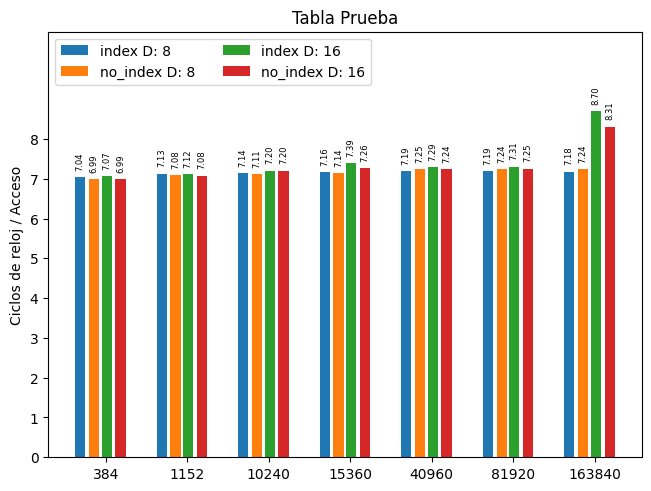

In [256]:
df_double = avg_of_best(leer_csv('data/double/ck_double.csv'))

df_int = avg_of_best(leer_csv('data/int/ck_int.csv'))

df_no_index = avg_of_best(leer_csv('data/no_index/ck_no_index.csv'))

graph_comparison(df_double, df_no_index, "index", "no_index")
# graph_comparison(df_double, df_int, "double", "int")